# Retrieval

This notebook shows how model retrieves similar images.

In [14]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from utils import visualize_retrieval
from processor import processor

# Load Retrieval Module
from model.modeling import Retrieval

retrieval_module = Retrieval()

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main


In [15]:
# We will use 90-th axial slice of some data.
mri = nib.load('BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz').get_fdata()
target_mri = mri[:, 90, :].astype(np.float32)
msk = nib.load('BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz').get_fdata()
target_msk = msk[:, 90, :].astype(np.float32)

(-0.5, 517.5, 517.5, -0.5)

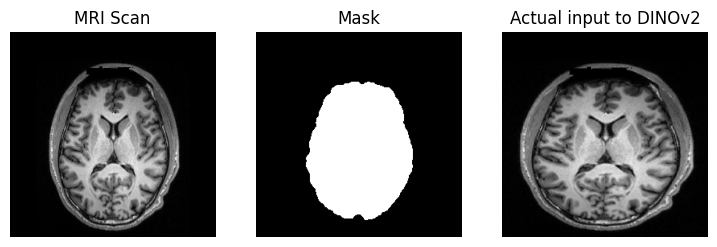

In [16]:
plt.figure(dpi=100, figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(processor(target_mri, mode='sam').permute(1, 2, 0))
plt.title('MRI Scan')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(processor(target_msk, mode='mask').permute(1, 2, 0), cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(processor(target_mri, mode='dino').permute(1, 2, 0))
plt.title('Actual input to DINOv2')
plt.axis('off')

We will retrieve ```n``` slices.
The most similar slices will be at the ```n```th index.

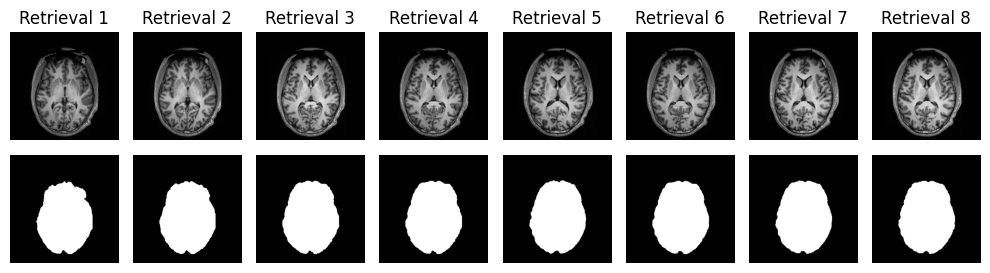

In [19]:
retrieval_result = retrieval_module(target_mri, n=8)
visualize_retrieval(retrieval_result)